<a href="https://colab.research.google.com/github/raamav/Image-Classification/blob/master/ImageClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using CNN
The purpose of this notebook is to create an image classifier using Convolutional Neural Networks (CNN)

The datset thats being used is the CIFAR10.

<br>

### Approach Summary & Result
TBD

<br>

**CONTENTS**
1. Getting/Setting-up the Data
2. Visualizing Data
3. Data Pre-Processing
4. Specifying the CNN Architechture
5. Training the CNN & Evaluating Performance
6. Closing Comments 


***

<br>

## 1.Getting/Setting-up the Data

In [0]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Specifying the tensorflow version
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# Importing Tensorflow and Keras. Checking the versions of the software

import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.1.0'

In [6]:
keras.__version__

'2.2.4-tf'

In [0]:
cifar10 = keras.datasets.cifar10

In [8]:
(X_train_full,y_train_full),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [9]:
print("shape of training data - images", X_train_full.shape)
print("shape of training data - labels", y_train_full.shape)
print("shape of test data - images", X_test.shape)

shape of training data - images (50000, 32, 32, 3)
shape of training data - labels (50000, 1)
shape of test data - images (10000, 32, 32, 3)


In [0]:
# Splitting the training data into training and validation samples
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size = 0.20, random_state = 42)

In [11]:
# The dimensions of the training and validation sets

print("shape of training data - images", X_train.shape)
print("shape of training data - labels", y_train.shape)


print("shape of valiation data - images", X_val.shape)
print("shape of validation data - labels", y_val.shape)


shape of training data - images (40000, 32, 32, 3)
shape of training data - labels (40000, 1)
shape of valiation data - images (10000, 32, 32, 3)
shape of validation data - labels (10000, 1)


***

## 2. Visualizing the Data

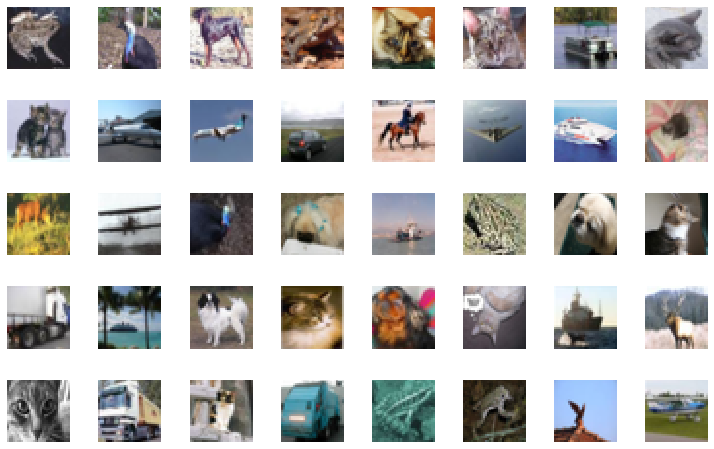

In [12]:
# Creating a standardized piece of code for visualizing the images

n_rows = 5
n_cols = 8

plt.figure(figsize=(n_cols * 1.6, n_rows * 1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***

## 3. Data Pre-Processing

Image data is in the scale of 0-255. While it is possible to simply divide the data by 255 to perform **min max scaling**, I shall be claculating the mean and standard deviation to normalize the training, validation and test sets



In [0]:
# Calculating pixel mean and std
pixel_mean = X_train.mean(axis = 0, keepdims = True)
pixel_sd = X_train.std(axis = 0, keepdims = True)

In [0]:
# Implementing Scaling

X_train_s = (X_train - pixel_mean)/pixel_sd
X_val_s = (X_val - pixel_mean)/pixel_sd
X_test_s = (X_test - pixel_mean)/pixel_sd

***

### 4. Specifying the CNN Architechture

In [0]:
# Basic Housekeeping

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# Specifying the CNN Architechture (16 layered)

model_cifar10 = keras.models.Sequential([
                    
                  keras.layers.Conv2D(filters = 64, kernel_size = (8,8), padding = "same", 
                                      input_shape = [32,32,3], activation = "relu"),
                  keras.layers.MaxPool2D(pool_size = (2,2)),

                  keras.layers.Conv2D(filters = 128, kernel_size= (4,4), padding = "same",activation = "relu"),
                  keras.layers.Conv2D(filters = 128, kernel_size= (4,4), padding = "same", activation = "relu"),
                  keras.layers.MaxPool2D(pool_size = (2,2)),

                  keras.layers.Conv2D(filters = 256, kernel_size=(4,4), padding = "same", activation = "relu"),
                  keras.layers.Conv2D(filters = 256, kernel_size=(4,4), padding = "same", activation = "relu"),
                  keras.layers.MaxPool2D(pool_size = (2,2)),

                  keras.layers.Flatten(),

                  keras.layers.Dense(units = 256, activation = "relu" ),
                  keras.layers.Dropout(rate = 0.4),

                  keras.layers.Dense(units = 128, activation = "relu" ),
                  keras.layers.Dropout(rate = 0.4),

                  keras.layers.Dense(units = 64, activation = "relu" ),
                  keras.layers.Dropout(rate = 0.4),

                  keras.layers.Dense(units = 10, activation = "softmax")

                                         
                                         
                                         ])

In [24]:
# A visual summary of the model
model_cifar10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        12352     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         524544    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         1

The model has ~3 million parameters, ~46% of the parameters are from the dense layers. 

*Might decide to do away with the dense layer with 256 units (that contributes ~1 million parameters) depending on the training time and performance of the model*

***
<br>

## 5. Training the CNN & Evaluating its Performance

In [0]:
# Specifying optimizer

sgd = keras.optimizers.SGD(lr = 1e-03, momentum = 0.7, nesterov = True)

In [0]:
# compiling model - specigy optimiseer, lss function and accuracy metric

model_cifar10.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [0]:
# implementing callbacks, checkppoint and early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_cnn", save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights= True)

Finally, the moment of truth.

In [28]:
# Finally, fitting the model. Specifying, Training and validation data, Epochs and callbacks

history_cifar10_cnn = model_cifar10.fit(X_train_s, y_train, epochs = 100, 
                                        validation_data = (X_val_s, y_val),
                                        callbacks = [checkpoint_cb, early_stopping_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 23s 579us/sample - loss: 2.2309 - accuracy: 0.1520 - val_loss: 2.0365 - val_accuracy: 0.2639
Epoch 2/100
40000/40000 [==============================] - 23s 582us/sample - loss: 2.0194 - accuracy: 0.2297 - val_loss: 1.8034 - val_accuracy: 0.3373
Epoch 3/100
40000/40000 [==============================] - 23s 568us/sample - loss: 1.8722 - accuracy: 0.2852 - val_loss: 1.6669 - val_accuracy: 0.3869
Epoch 4/100
40000/40000 [==============================] - 23s 566us/sample - loss: 1.7669 - accuracy: 0.3281 - val_loss: 1.6007 - val_accuracy: 0.4105
Epoch 5/100
40000/40000 [==============================] - 23s 565us/sample - loss: 1.6736 - accuracy: 0.3683 - val_loss: 1.4989 - val_accuracy: 0.4326
Epoch 6/100
40000/40000 [==============================] - 23s 572us/sample - loss: 1.6038 - accuracy: 0.3977 - val_loss: 1.4236 - val_accuracy: 0.4615
Epoch 7/100
40000/40000 [=============

**Training and Validation Set Performance**

The model seems to be overfitting quite a bit (large difference between training and validation set accuracy)

*Will be modfying the model architechture to get a better result*

<br>

#### Revised Model Architechture
**SEVEN** Quick Fixes
1. Decresing the number of unitsof the dense layer *(one with 256 units)* that contributed to *a third* of the original set of parameters
2. Inreasing the `Dropout` rate for the dense layers to 0.5 (from the current rate of 0.4)
3. Incorporating `Batch Normalization` after every convolutional and dense layer *(except the input and output layers)*
4. Changing the Activation Function to `elu` *(for better gradient propogation through the network)*
5. Decreasing the `filer_size` of the last convolutional layer to `(3,3)` *(attempt to further reduce the number of parameters)*
6. Increasing the coefficient of the `momentum optimizer` to `0.9` *(speeds up convergence, ensures that model doesn't get stuck at local mimima)*
7. Introducing **initialization parameters** for the activation functions, setting `kernel_initializer` to `he_normal`

In [0]:
# Resetting the model parameters

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model_cifar10_v2 = keras.models.Sequential([
                    
                  keras.layers.Conv2D(filters = 64, kernel_size = (6,6), padding = "same", 
                                      input_shape = [32,32,3], activation = "elu"),
                  keras.layers.MaxPool2D(pool_size = (2,2)),

                  keras.layers.Conv2D(filters = 128, kernel_size= (3,3), padding = "same",activation = "elu", kernel_initializer = "he_normal"),
                  keras.layers.BatchNormalization(),
                  keras.layers.Conv2D(filters = 128, kernel_size= (3,3), padding = "same", activation = "elu", kernel_initializer = "he_normal"),
                  keras.layers.BatchNormalization(),
                  keras.layers.MaxPool2D(pool_size = (2,2)),

                  keras.layers.Conv2D(filters = 256, kernel_size=(3,3), padding = "same", activation = "elu", kernel_initializer = "he_normal"),
                  keras.layers.BatchNormalization(),
                  keras.layers.Conv2D(filters = 256, kernel_size=(3,3), padding = "same", activation = "elu" , kernel_initializer = "he_normal"),
                  keras.layers.BatchNormalization(),
                  keras.layers.MaxPool2D(pool_size = (2,2)),

                  keras.layers.Flatten(),

                  keras.layers.Dense(units = 128, activation = "relu" ),
                  keras.layers.Dropout(rate = 0.5),

                  keras.layers.Dense(units = 128, activation = "elu", kernel_initializer = "he_normal" ),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dropout(rate = 0.5),

                  keras.layers.Dense(units = 64, activation = "elu",  kernel_initializer = "he_normal" ),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dropout(rate = 0.5),

                  keras.layers.Dense(units = 10, activation = "softmax")

                                         
                                         
                                         ])

In [34]:
# A visual summary of the model
model_cifar10_v2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        6976      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

We've reduced the no of parameters by 20% (which is **significant**)

In [0]:
# Specifying optimizer

sgd_v2 = keras.optimizers.SGD(lr = 5e-04, momentum = 0.9, nesterov = True)


# compiling model - specigy optimiseer, lss function and accuracy metric

model_cifar10_v2.compile(optimizer = sgd_v2, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


# implementing callbacks, checkppoint and early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_cnn_v2", save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 25, restore_best_weights= True)


In [36]:
# Finally, fitting the model. Specifying, Training and validation data, Epochs and callbacks

history_cifar10_cnn_v2 = model_cifar10_v2.fit(X_train_s, y_train, epochs = 150, 
                                        validation_data = (X_val_s, y_val),
                                        callbacks = [checkpoint_cb, early_stopping_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 20s 488us/sample - loss: 2.3766 - accuracy: 0.2246 - val_loss: 1.5948 - val_accuracy: 0.4229
Epoch 2/150
40000/40000 [==============================] - 18s 455us/sample - loss: 1.8214 - accuracy: 0.3225 - val_loss: 1.4453 - val_accuracy: 0.4837
Epoch 3/150
40000/40000 [==============================] - 18s 458us/sample - loss: 1.6493 - accuracy: 0.3915 - val_loss: 1.3420 - val_accuracy: 0.5280
Epoch 4/150
40000/40000 [==============================] - 18s 453us/sample - loss: 1.5400 - accuracy: 0.4356 - val_loss: 1.2709 - val_accuracy: 0.5386
Epoch 5/150
40000/40000 [==============================] - 19s 470us/sample - loss: 1.4574 - accuracy: 0.4696 - val_loss: 1.2033 - val_accuracy: 0.5696
Epoch 6/150
40000/40000 [==============================] - 19s 475us/sample - loss: 1.3971 - accuracy: 0.4948 - val_loss: 1.1492 - val_accuracy: 0.5926
Epoch 7/150
40000/40000 [=============

**Training and Validation Set Performance**

This model also performs similar to the previous one. Despite my multiple attempts, I haven't been able to improve upon the accuracy of the model


<br>

**Training and Validation Curves**

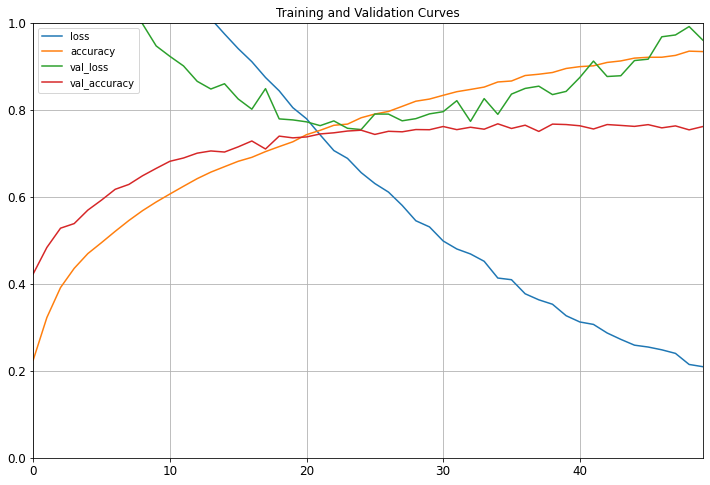

In [37]:
# Visualizing the model performance

pd.DataFrame(history_cifar10_cnn_v2.history).plot(figsize = (12,8))
plt.title("Training and Validation Curves")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Test Set Accuracy**

In [38]:
# Evaluating Accuracy on Test Data

model_cifar10_v2.evaluate(X_test_s, y_test)

10000/10000 [==============================] - 2s 169us/sample - loss: 0.7874 - accuracy: 0.7441


[0.7874091276168823, 0.7441]

*comments*

***

## 6. Closing Comments

*TBD*
